In [23]:
# Import module yang akan digunakan
import pandas as pd  
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
dataset = pd.read_csv('csv/data_training.csv')

In [25]:
# Membagi data training dan testing
X = dataset.drop('kelas', axis=1)  
y = dataset['kelas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)

In [26]:
# Inisiasi SVM
cls = svm.SVC(kernel="linear")

# Membuat model
cls.fit(X_train,y_train)

# Melakukan prediksi / clasifikasi
y_pred = cls.predict(X_test)

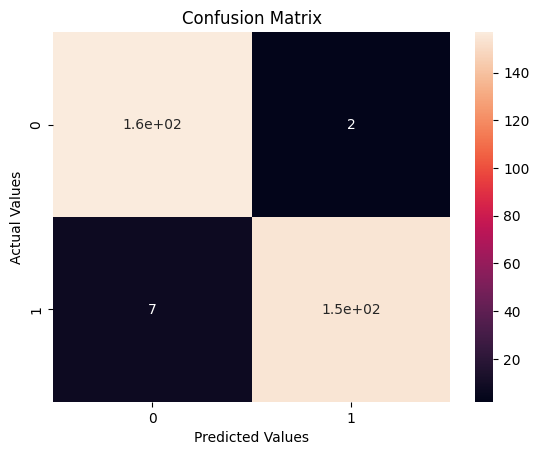

In [36]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [37]:
print("Recall: ",round(recall_score(y_test, y_pred, pos_label='matang')*100,1), "%")
print("Precision: ",round(precision_score(y_test, y_pred, pos_label='matang')*100,1), "%")
print("F1-Score: ",round(f1_score(y_test, y_pred, pos_label='matang')*100,1), "%")
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100,1), "%")

Recall:  98.7 %
Precision:  95.7 %
F1-Score:  97.2 %
Accuracy: 97.2 %


In [20]:
#Save model
from joblib import dump, load
dump(cls, 'model.joblib')

['model.joblib']